In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = []
with open('results.csv') as results:
    for l in results.readlines():
        if 'judgement' in l:
            res.append(l)

In [3]:
with open('results_cleaned.csv', 'w') as f:
    f.write('time,ip,controller,order,inner,label,square,pennelement_type,pennelement_name,parameter,value,event_time,id,text,mod,lin,syn,dupl,comments\n')
    for l in res:
        f.write(l)

In [156]:
data = pd.read_csv('results_cleaned.csv')

In [157]:
data = data[['time', 'text', 'mod', 'lin', 'syn', 'dupl', 'value']]

In [158]:
data

,time,text,mod,lin,syn,dupl,value
0,1734465754,У меня самого сейчас возникли вопросы к органи...,sam,R,high,False,7
1,1734465754,У всех у нас сегодня очень интересные доклады.,vse,L,high,True,7
2,1734465754,Я каждый раз прошу у него помощи уставшего.,depic,E,low,False,1
3,1734465754,У нас у всех сегодня очень интересные доклады.,vse,R,high,True,7
4,1734465754,И у больного него часто получается лучше%2C че...,depic,L,high,False,1
...,...,...,...,...,...,...,...
1435,1735050392,Не волнуйся%2C он у нас это спрашивал каждого.,kazhdy,E,low,False,1
1436,1735050392,У нас недавно у всех произошло трагическое соб...,vse,E,high,True,7
1437,1735050392,У тебя и пьяного иногда отлично голова работает.,depic,R,high,False,7
1438,1735050392,Мы у них уже бывали в гостях всех.,vse,E,low,False,2


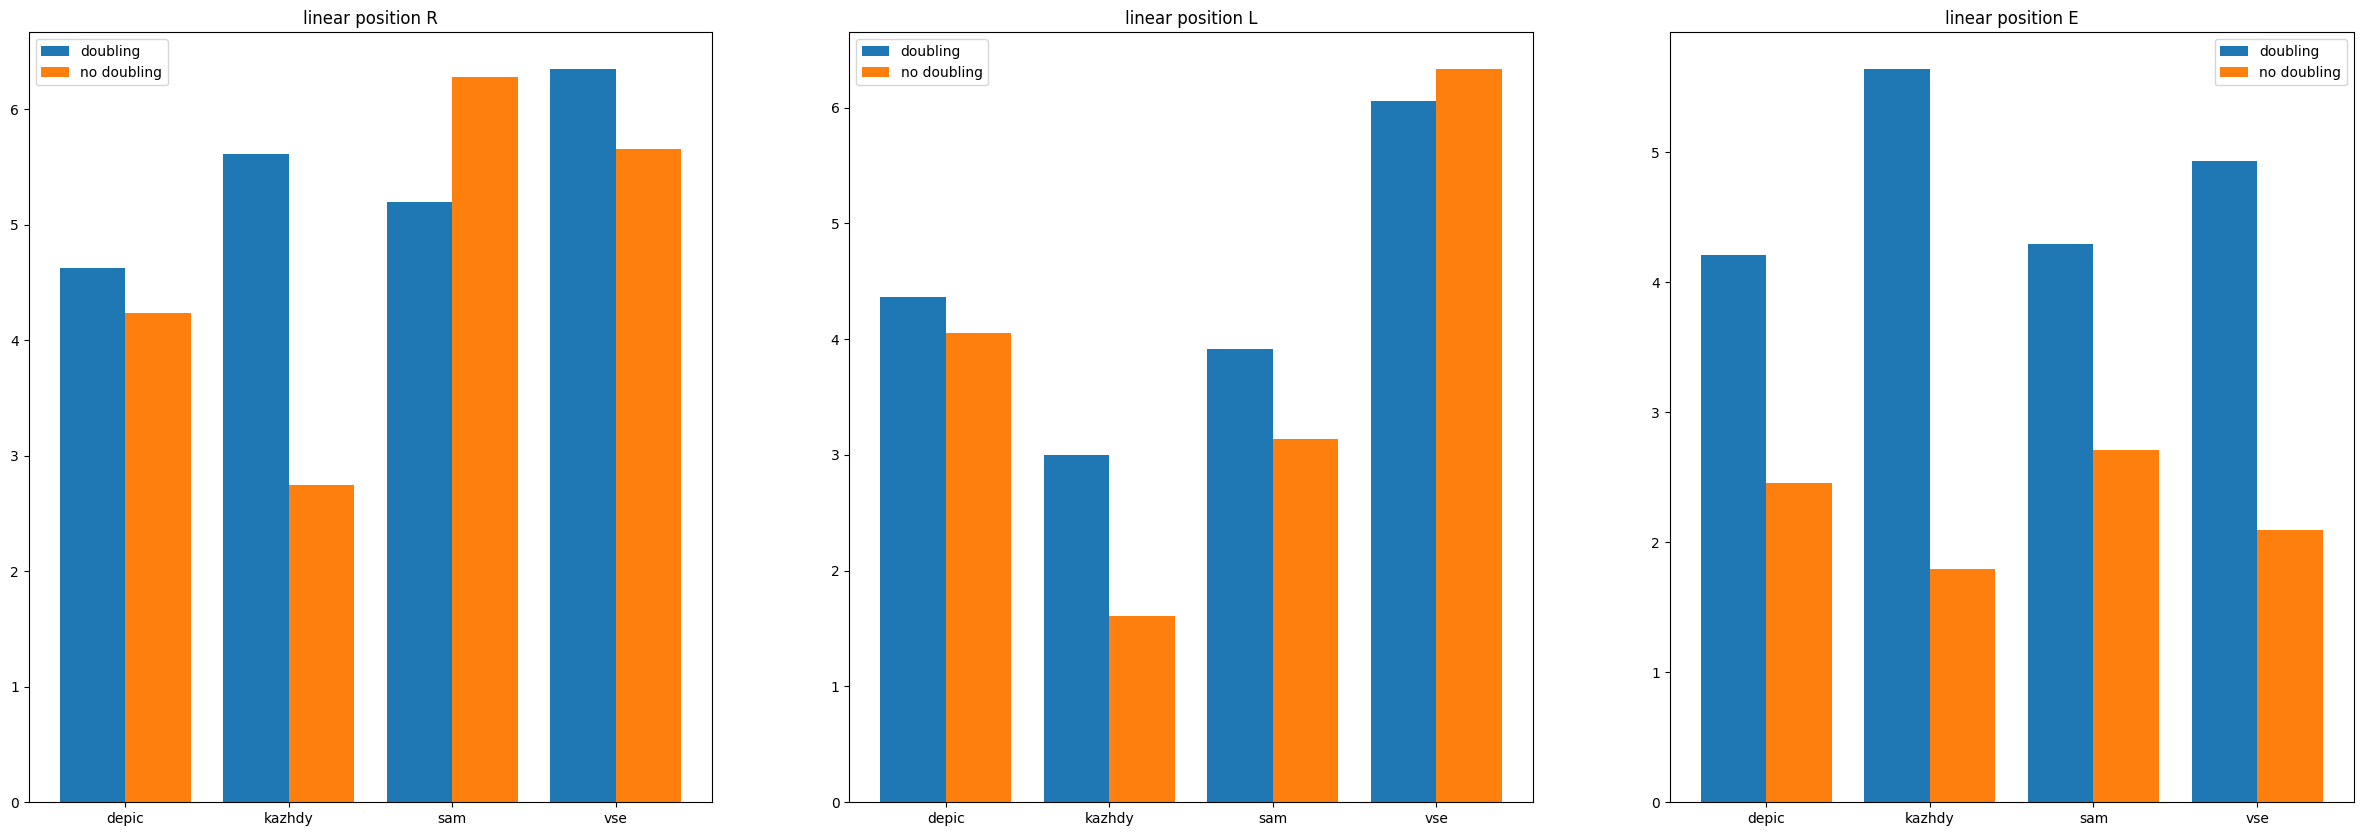

In [204]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
for ax, lin in zip(axes.flatten(), data['lin'].unique()):
    data_r = data[data['lin'] == lin].groupby(['mod', 'lin', 'dupl'])['value'].mean().reset_index()
    bars = data_r['mod'].unique()
    x = np.arange(len(bars))
    width = 0.4

    ax.bar(x - 0.2, data_r[ data_r['dupl']]['value'], align='center', width=width)
    ax.bar(x + 0.2, data_r[~data_r['dupl']]['value'], align='center', width=width)
    ax.set_title(f'linear position {lin}')
    ax.set_xticks(x, bars)
    ax.legend(['doubling', 'no doubling'])